# imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import networkx as nx
import datetime
import os
import analysis_util

# Data

In [3]:
p = '/home/pelle/Master_Thesis/data/raw/wallstreetbets/'
df_post = pd.read_csv(p+'submissions_pmaw_2016-2021_wsb.csv',usecols=['author','created_utc','score','num_comments','title','selftext','id','award_count'])
df_post = df_post[df_post['author'] != '[deleted]']
df_post['subreddit']='wallstreetbets'

# rename columns
df_post.rename(columns={'created_utc':'date','num_comments':'n_comments','selftext':'text','id':'id','award_count':'n_awards'},inplace=True)
df_post = df_post[['author','date','score','n_comments','title','text','id','n_awards','subreddit']]
print('Posts loaded')
print(len(df_post))
df_post.head()

Posts loaded
1140647


,author,date,score,n_comments,title,text,id,n_awards,subreddit
2,busterbluthOT,2017-04-21 08:04:16,0.0,4.0,Which one of you was this?,NaN,66nuz5,0.0,wallstreetbets
4,tulipBulbs,2017-04-21 07:36:32,0.0,6.0,You heard it here first,https://www.washingtonpost.com/world/europe/th...,66nrup,0.0,wallstreetbets
5,-RiskManagement-,2017-04-21 07:19:28,1.0,5.0,I think this might be helpful for everyone,NaN,66nptj,0.0,wallstreetbets
7,xeno211,2017-04-21 07:04:32,0.0,16.0,Algorithm and ml,Hey do any of you guys use machine learning or...,66nnsb,0.0,wallstreetbets
8,rentmypie,2017-04-21 06:58:08,0.0,8.0,chances of a $TSLA short squeeze? 24.6% shorte...,NaN,66nmz6,0.0,wallstreetbets


In [4]:
# subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
period = '2015-01-01-2022-01-01'

df_post_dict = {}
df_comment_dict = {}
df_all_nodes_dict = {}
G_dict = {}
G_di_dict = {}
df_authors_dict = {}
df_comment_post_dict = {}


# for subreddit in subreddits:
#     print(subreddit)
#     path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
#     path_awards = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards.csv"
#     df_post=analysis_util.read_posts(path_post,path_awards)
#     df_post_dict[subreddit] = df_post
#     df_post_dict[subreddit]['n_awards'] = df_post_dict[subreddit]['n_awards'].fillna(0)
#     df_post_dict[subreddit]['n_awards'] = df_post_dict[subreddit]['n_awards'].astype(int)
#     df_post_dict[subreddit]['subreddit'] = subreddit
#     # drop columns
#     df_post_dict[subreddit]=df_post_dict[subreddit][['author','date','score','n_comments','title','text','id','n_awards','subreddit']]

In [5]:
p = '/home/pelle/Master_Thesis/data/raw/wallstreetbets/'
df_post_dict['wallstreetbets'] = pd.read_csv(p+'submissions_pmaw_2016-2021_wsb.csv',usecols=['author','created_utc','score','num_comments','title','selftext','id','award_count'])
df_post_dict['wallstreetbets'] = df_post_dict['wallstreetbets'][df_post_dict['wallstreetbets']['author'] != '[deleted]']
df_post_dict['wallstreetbets']['subreddit']='wallstreetbets'

# rename columns
df_post_dict['wallstreetbets'].rename(columns={'created_utc':'date','num_comments':'n_comments','selftext':'text','id':'id','award_count':'n_awards'},inplace=True)
df_post_dict['wallstreetbets'] = df_post_dict['wallstreetbets'][['author','date','score','n_comments','title','text','id','n_awards','subreddit']]
print('Posts loaded')
print(len(df_post_dict['wallstreetbets']))
df_post_dict['wallstreetbets'].head()

Posts loaded
1140647


,author,date,score,n_comments,title,text,id,n_awards,subreddit
2,busterbluthOT,2017-04-21 08:04:16,0.0,4.0,Which one of you was this?,NaN,66nuz5,0.0,wallstreetbets
4,tulipBulbs,2017-04-21 07:36:32,0.0,6.0,You heard it here first,https://www.washingtonpost.com/world/europe/th...,66nrup,0.0,wallstreetbets
5,-RiskManagement-,2017-04-21 07:19:28,1.0,5.0,I think this might be helpful for everyone,NaN,66nptj,0.0,wallstreetbets
7,xeno211,2017-04-21 07:04:32,0.0,16.0,Algorithm and ml,Hey do any of you guys use machine learning or...,66nnsb,0.0,wallstreetbets
8,rentmypie,2017-04-21 06:58:08,0.0,8.0,chances of a $TSLA short squeeze? 24.6% shorte...,NaN,66nmz6,0.0,wallstreetbets


# Balance

In [6]:
subreddits = ['wallstreetbets']

# join all posts
df_post = pd.concat([df_post_dict[subreddit] for subreddit in subreddits])

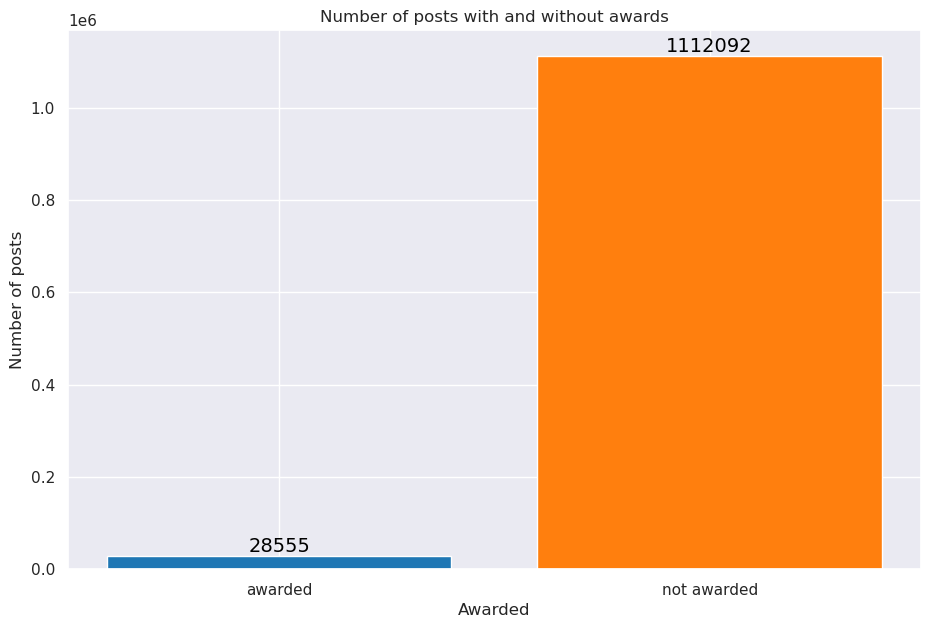

In [7]:
len1=len(df_post.loc[df_post['n_awards'] > 0])
len2=len(df_post.loc[df_post['n_awards'] == 0])

# plot  
fig, ax = plt.subplots(figsize=(11,7))
ax.bar(['awarded','not awarded'],[len1,len2],color=['#1f77b4','#ff7f0e'])
ax.set_title('Number of posts with and without awards')
# insert text
ax.text(0, len1, str(len1), ha='center', va='bottom', color='black', fontsize=14)
ax.text(1, len2, str(len2), ha='center', va='bottom', color='black', fontsize=14)
ax.set_ylabel('Number of posts')
ax.set_xlabel('Awarded')
plt.show()

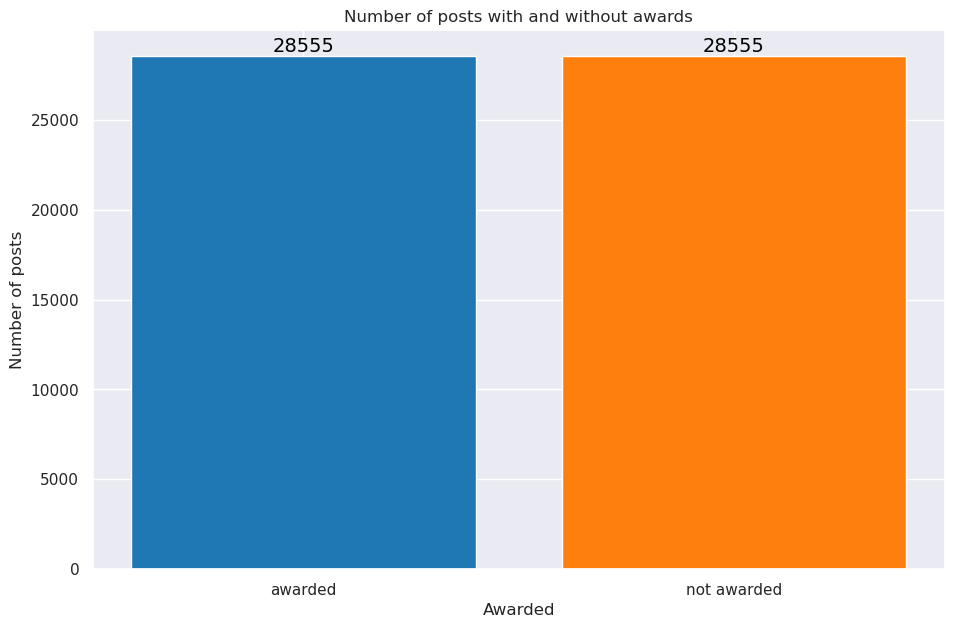

In [8]:
# df blanced
df_post_awarded = df_post.loc[df_post['n_awards'] > 0]
df_post_not_awarded = df_post.loc[df_post['n_awards'] == 0]

df_post_not_awarded = df_post_not_awarded.sample(n=len(df_post_awarded), random_state=1)
df_post_balanced = pd.concat([df_post_awarded,df_post_not_awarded])

# plot
fig, ax = plt.subplots(figsize=(11,7))
ax.bar(['awarded','not awarded'],[len(df_post_awarded),len(df_post_not_awarded)],color=['#1f77b4','#ff7f0e'])
ax.set_title('Number of posts with and without awards')
# insert text
ax.text(0, len(df_post_awarded), str(len(df_post_awarded)), ha='center', va='bottom', color='black', fontsize=14)
ax.text(1, len(df_post_not_awarded), str(len(df_post_not_awarded)), ha='center', va='bottom', color='black', fontsize=14)
ax.set_ylabel('Number of posts')
ax.set_xlabel('Awarded')
plt.show()

# Cleaning

In [9]:
df_post_balanced['date'] = pd.to_datetime(df_post_balanced['date'])

df_post_balanced['text'].fillna('', inplace=True)
df_post_balanced['title'].fillna('', inplace=True)
df_post_balanced['text'] = df_post_balanced['text'].astype(str)
df_post_balanced['title'] = df_post_balanced['title'].astype(str)
df_post_balanced['subreddit'] = df_post_balanced['subreddit'].astype(str)
df_post_balanced['author'] = df_post_balanced['author'].astype(str)
df_post_balanced['id'] = df_post_balanced['id'].astype(str)

for char in ['\n','\r','\t']:
    df_post_balanced['text'] = df_post_balanced['text'].str.replace(char, ' ')
    df_post_balanced['title'] = df_post_balanced['title'].str.replace(char, ' ')

df_post_balanced['text_title'] = df_post_balanced['title'] + ' ' + df_post_balanced['text']

# network features (test)

In [10]:
df_post_balanced['pre_date'] = df_post_balanced['date']-pd.Timedelta(weeks=10) 

In [11]:
p = '/home/pelle/Master_Thesis/data/raw/wallstreetbets/'
df_comments = pd.read_csv(p+'comments_pmaw_2016-2021_wsb.csv',usecols=['author','parent_author','created_utc'])
df_comments = df_comments[df_comments['author'] != '[deleted]']
df_comments.created_utc = pd.to_datetime(df_comments.created_utc,unit='s')

In [12]:
def degree_centrality(degree,N):
    return degree/(N-1)

# df for each parrallel process

def get_graph_WSB(pre_date,date,author,id):
    df_comments_sub = df_comments[(df_comments['created_utc'] >= pre_date) & (df_comments['created_utc'] < date)]
    df_post_sub = df_post_balanced[(df_post_balanced['date'] >= pre_date) & (df_post_balanced['date'] < date)]

    if author in df_comments_sub['author'].values or author in df_comments_sub['parent_author'].values:
        G = nx.from_pandas_edgelist(df_comments_sub, 'author', 'parent_author', create_using=nx.Graph())
        degree = G.degree(author)
        degree_cen = degree_centrality(degree,len(G.nodes))
        close_cen  = nx.closeness_centrality(G, u=author)   
    else:
        degree_cen = 0
        close_cen = 0
        degree = 0

    activity = len(df_comments_sub.loc[df_comments_sub['author']==author]) + len(df_post_sub.loc[df_post_sub['author']==author])

    return degree_cen,close_cen,activity,degree, id

In [13]:
pre_date = df_post_balanced['pre_date'].iloc[0]
date = df_post_balanced['date'].iloc[0]
df_comments_sub = df_comments[(df_comments['created_utc'] >= pre_date) & (df_comments['created_utc'] < date)]
len(df_comments_sub.loc[df_comments_sub.author=='___sean'])
# df_comments_sub

683

Average Neighbor,
Degree	,
Clustering Coefficient	,
Eigenvector Centrality	,
Closeness Centrality	,
Degree Centrality	,
Betweenness Centrality,

slow 
- betweeness
- clustering
- eigen

fast 
- degree centrality
- closeness
- degree

semi fast
- avg neigh degree


In [14]:
print(len(df_post_balanced))

57110


In [15]:
seconds = ((60)/10) * 57110
minutes = seconds / 60
hours = minutes / 60
days = hours / 24

print('Time to run: ',seconds,' seconds')
print('Time to run: ',minutes,' minutes')
print('Time to run: ',hours,' hours')
print('Time to run: ',days,' days')

Time to run:  342660.0  seconds
Time to run:  5711.0  minutes
Time to run:  95.18333333333334  hours
Time to run:  3.9659722222222222  days


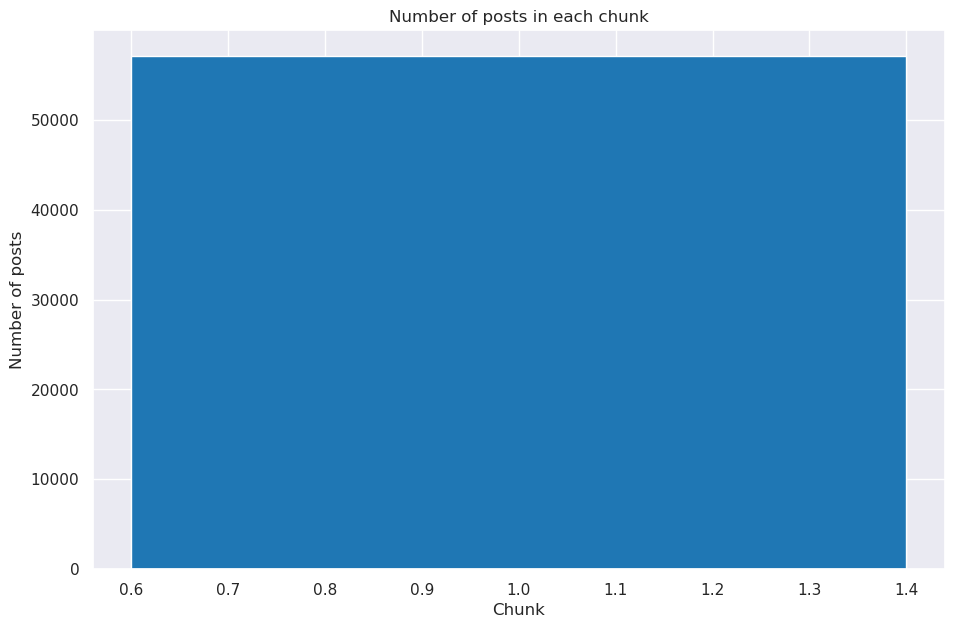

In [25]:
# %timeit ((60*4)/57)
# add chunk number column to dataframe 
# df_post_balanced['chunk'] = df_post_balanced.index // 300000 +1

df_post_balanced['chunk'].unique()


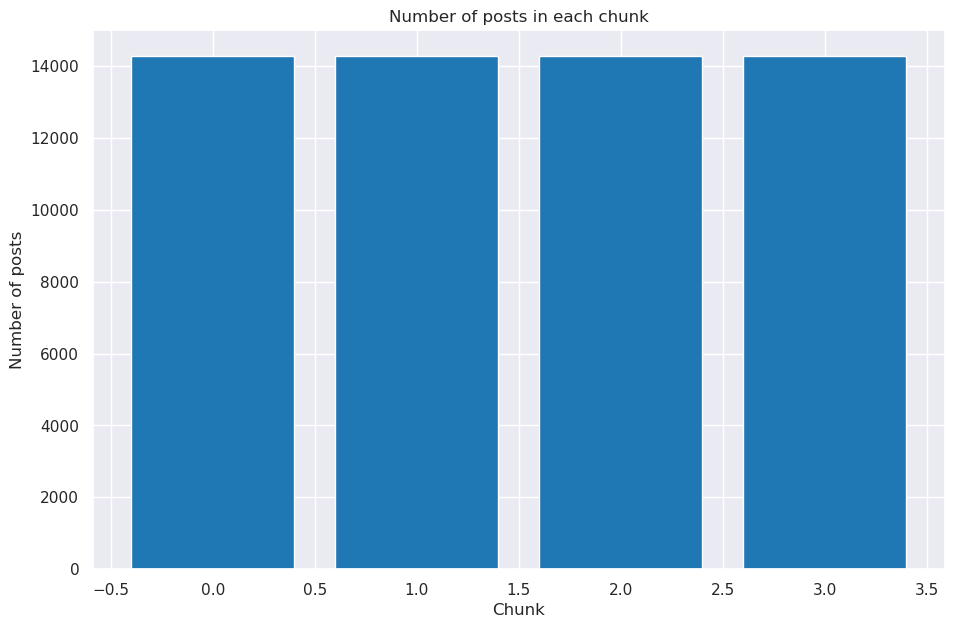

In [45]:
# # add chunk number column to dataframe
df_post_balanced['chunk'] = np.arange(len(df_post_balanced)) // (len(df_post_balanced)/4)


# plot chunk bar
fig, ax = plt.subplots(figsize=(11,7))
ax.bar(df_post_balanced['chunk'].unique(),df_post_balanced['chunk'].value_counts(),color='#1f77b4')
ax.set_title('Number of posts in each chunk')
ax.set_ylabel('Number of posts')
ax.set_xlabel('Chunk')
plt.show()

df_post_balanced.to_csv('balanced_data_chunked4.csv',index=False)

In [17]:
# from joblib import Parallel, delayed
# import multiprocessing
# import time

# df_post_balanced=df_post_balanced[:500]


# start = time.time()
# num_cores = 1
# res = Parallel(n_jobs=num_cores)(delayed(get_graph_WSB)(df_post_balanced['pre_date'].iloc[i],df_post_balanced['date'].iloc[i],df_post_balanced['author'].iloc[i],df_post_balanced['id'].iloc[i]) for i in range(len(df_post_balanced)))
# end = time.time()
# print('1 core')
# print(end - start)
# print()

# start = time.time()
# num_cores = 4
# res = Parallel(n_jobs=num_cores)(delayed(get_graph_WSB)(df_post_balanced['pre_date'].iloc[i],df_post_balanced['date'].iloc[i],df_post_balanced['author'].iloc[i],df_post_balanced['id'].iloc[i]) for i in range(len(df_post_balanced)))
# end = time.time()
# print('4 cores')
# print(end - start)